In [ ]:
import numpy as np
import skfuzzy as fuzz
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('./data/data.csv')
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [3]:
new_column_order = ['id', 'name', 'artists', 'year','popularity'] + [col for col in df.columns if col not in ['id', 'name', 'artists', 'year','popularity']]
df = df[new_column_order]
df

,id,name,artists,year,popularity,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4,0.0594,0.98200,0.279,831667,0.211,0,0.878000,10,0.6650,-20.096,1,1921,0.0366,80.954
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],1921,5,0.9630,0.73200,0.819,180533,0.341,0,0.000000,7,0.1600,-12.441,1,1921,0.4150,60.936
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5,0.0394,0.96100,0.328,500062,0.166,0,0.913000,3,0.1010,-14.850,1,1921,0.0339,110.339
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],1921,3,0.1650,0.96700,0.275,210000,0.309,0,0.000028,5,0.3810,-9.316,1,1921,0.0354,100.109
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],1921,2,0.2530,0.95700,0.418,166693,0.193,0,0.000002,3,0.2290,-10.096,1,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0KkIkfsLEJbrcIhYsCL7L5,China,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",2020,72,0.6080,0.08460,0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1,2020-05-29,0.0881,105.029
170649,0OStKKAuXlxA0fMH54Qs6E,Halloweenie III: Seven Days,['Ashnikko'],2020,68,0.7340,0.20600,0.717,150654,0.753,0,0.000000,7,0.1010,-6.020,1,2020-10-23,0.0605,137.936
170650,4BZXVFYCb76Q0Klojq4piV,AYA,['MAMAMOO'],2020,76,0.6370,0.10100,0.634,211280,0.858,0,0.000009,4,0.2580,-2.226,0,2020-11-03,0.0809,91.688
170651,5SiZJoLXp3WOl3J4C8IK0d,Darkness,['Eminem'],2020,70,0.1950,0.00998,0.671,337147,0.623,1,0.000008,2,0.6430,-7.161,1,2020-01-17,0.3080,75.055


In [4]:
df.shape

(170653, 19)

In [5]:
df = df.drop(['duration_ms', 'release_date','liveness'], axis=1)
df.head()

,id,name,artists,year,popularity,valence,acousticness,danceability,energy,explicit,instrumentalness,key,loudness,mode,speechiness,tempo
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4,0.0594,0.982,0.279,0.211,0,0.878000,10,-20.096,1,0.0366,80.954
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],1921,5,0.9630,0.732,0.819,0.341,0,0.000000,7,-12.441,1,0.4150,60.936
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5,0.0394,0.961,0.328,0.166,0,0.913000,3,-14.850,1,0.0339,110.339
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],1921,3,0.1650,0.967,0.275,0.309,0,0.000028,5,-9.316,1,0.0354,100.109
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],1921,2,0.2530,0.957,0.418,0.193,0,0.000002,3,-10.096,1,0.0380,101.665


In [6]:
df[df.duplicated()].size

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                170653 non-null  object 
 1   name              170653 non-null  object 
 2   artists           170653 non-null  object 
 3   year              170653 non-null  int64  
 4   popularity        170653 non-null  int64  
 5   valence           170653 non-null  float64
 6   acousticness      170653 non-null  float64
 7   danceability      170653 non-null  float64
 8   energy            170653 non-null  float64
 9   explicit          170653 non-null  int64  
 10  instrumentalness  170653 non-null  float64
 11  key               170653 non-null  int64  
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  speechiness       170653 non-null  float64
 15  tempo             170653 non-null  float64
dtypes: float64(8), int64

In [8]:
print(f"Possible values for mode : {df['mode'].unique()}")
print(f"Possible values for key : {df['key'].unique()}")
print(f"Possible values for explicit : {df['explicit'].unique()}")
attributes = ['year','popularity']

for attr in attributes:
    attr_range = f"{df[attr].min()} – {df[attr].max()}"
    print(f"Range for {attr}: {attr_range}")

Possible values for mode : [1 0]
Possible values for key : [10  7  3  5  2  0  1  8  9  4 11  6]
Possible values for explicit : [0 1]
Range for year: 1921 – 2020
Range for popularity: 0 – 100


In [9]:
X = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'tempo', 'valence']].values

In [10]:
n_clusters = 6
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X.T, n_clusters, 2, error=0.005, maxiter=1000, init=None
)

C:\Users\khushi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


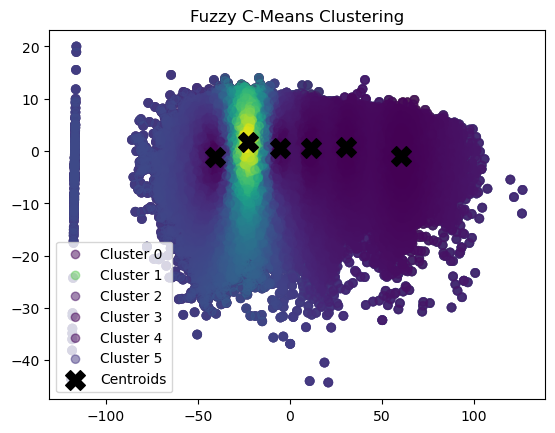

In [11]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

for i in range(n_clusters):
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=u[i, :], label=f'Cluster {i}', alpha=0.5)

plt.scatter(pca.transform(cntr)[:, 0], pca.transform(cntr)[:, 1], marker='X', s=200, c='black', label='Centroids')
plt.legend()
plt.title("Fuzzy C-Means Clustering")
plt.show()

In [12]:
def assign_clusters(u, threshold=0.35):
    clusters = []
    for i in range(u.shape[1]):
        clusters_for_point = [cluster for cluster in range(u.shape[0]) if u[cluster, i] >= threshold]
        clusters.append(clusters_for_point)
    return clusters

df['clusters'] = assign_clusters(u)

In [13]:
df

,id,name,artists,year,popularity,valence,acousticness,danceability,energy,explicit,instrumentalness,key,loudness,mode,speechiness,tempo,clusters
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4,0.0594,0.98200,0.279,0.211,0,0.878000,10,-20.096,1,0.0366,80.954,[1]
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],1921,5,0.9630,0.73200,0.819,0.341,0,0.000000,7,-12.441,1,0.4150,60.936,[1]
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5,0.0394,0.96100,0.328,0.166,0,0.913000,3,-14.850,1,0.0339,110.339,[2]
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],1921,3,0.1650,0.96700,0.275,0.309,0,0.000028,5,-9.316,1,0.0354,100.109,[5]
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],1921,2,0.2530,0.95700,0.418,0.193,0,0.000002,3,-10.096,1,0.0380,101.665,[5]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0KkIkfsLEJbrcIhYsCL7L5,China,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",2020,72,0.6080,0.08460,0.786,0.808,0,0.000289,7,-3.702,1,0.0881,105.029,[2]
170649,0OStKKAuXlxA0fMH54Qs6E,Halloweenie III: Seven Days,['Ashnikko'],2020,68,0.7340,0.20600,0.717,0.753,0,0.000000,7,-6.020,1,0.0605,137.936,"[0, 4]"
170650,4BZXVFYCb76Q0Klojq4piV,AYA,['MAMAMOO'],2020,76,0.6370,0.10100,0.634,0.858,0,0.000009,4,-2.226,0,0.0809,91.688,[5]
170651,5SiZJoLXp3WOl3J4C8IK0d,Darkness,['Eminem'],2020,70,0.1950,0.00998,0.671,0.623,1,0.000008,2,-7.161,1,0.3080,75.055,[1]


In [14]:
df['clusters'].value_counts()

[4]       30955
[2]       30220
[5]       29884
[1]       25681
[0]       20159
[3]       16247
[2, 4]     4886
[1, 5]     4244
[2, 5]     3490
[0, 4]     3109
[0, 3]     1157
[]          621
Name: clusters, dtype: int64

In [15]:
exploded_df = df.explode('clusters')

cluster_df = exploded_df.groupby("clusters").agg("mean")
cluster_df["count"] = exploded_df.groupby("clusters").size()
cluster_df = cluster_df[["count", "acousticness", "danceability", "energy", "instrumentalness", "loudness", "speechiness", "tempo", "valence"]]
cluster_df

C:\Users\khushi\AppData\Local\Temp\ipykernel_3748\3693432775.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_df = exploded_df.groupby("clusters").agg("mean")


,count,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
clusters,,,,,,,,,
0,24425,0.389258,0.525134,0.573123,0.132136,-9.844514,0.087464,147.129430,0.554936
1,29925,0.699303,0.449816,0.314413,0.259524,-14.531556,0.119115,76.801152,0.401448
2,38596,0.495615,0.598652,0.494164,0.155413,-11.204068,0.086808,111.648286,0.568553
3,17404,0.433316,0.447006,0.547334,0.131108,-10.321171,0.121444,176.929356,0.567915
4,38950,0.450012,0.586075,0.523481,0.153439,-10.711366,0.087563,128.084927,0.563289
5,37618,0.497396,0.554890,0.485544,0.145233,-11.131127,0.101289,94.069800,0.524964


In [33]:
cluster_df.to_csv('./data/clusters_fuzzy.csv')

# Clusters Analysis

## Cluster 0: **Pop-Rock**
* **Key Features**: High energy (0.57), fast tempo (147 BPM), electric-leaning (0.39 acousticness)
* **Fit**: Energy and tempo match rock dynamics, while moderate danceability (0.53) reflects pop influence. Electric-heavy sound signature aligns with genre's core characteristics.

## Cluster 1: **Indie Pop**
* **Key Features**: High danceability (0.60), balanced acousticness (0.50), upbeat mood (0.57 valence) 
* **Fit**: Even mix of acoustic/electric elements and moderate energy (0.49) captures indie pop's balanced, accessible sound. Medium tempo (111 BPM) suits the relaxed style.

## Cluster 2: **Acoustic Folk / Classical**
* **Key Features**: Highest acousticness (0.70), lowest energy (0.31), slowest tempo (76 BPM)
* **Fit**: Strongly acoustic nature with high instrumentalness (0.26) reflects traditional instrumentation. Low energy and tempo match the contemplative style.

## Cluster 3: **Alternative R&B**
* **Key Features**: Balanced acousticness (0.50), moderate danceability (0.55), medium tempo (94 BPM)
* **Fit**: Even distribution of features captures Alt-R&B's fusion style. Moderate energy (0.49) and valence (0.52) suit the genre's smooth, contemporary vibe.

## Cluster 4: **EDM**
* **Key Features**: Highest tempo (177 BPM), high energy (0.55), electronic-based (0.43 acousticness)
* **Fit**: Fast pace and electronic emphasis perfectly match EDM characteristics. High valence (0.57) reflects the genre's energetic nature.

## Cluster 5: **Dance Pop**
* **Key Features**: High danceability (0.59), moderate energy (0.52), dance-optimized tempo (128 BPM)
* **Fit**: Perfect balance of danceability and energy with mainstream tempo represents classic dance pop production style.

Each cluster shows distinct attribute patterns that naturally align with its assigned genre, creating clear separations in the musical space.

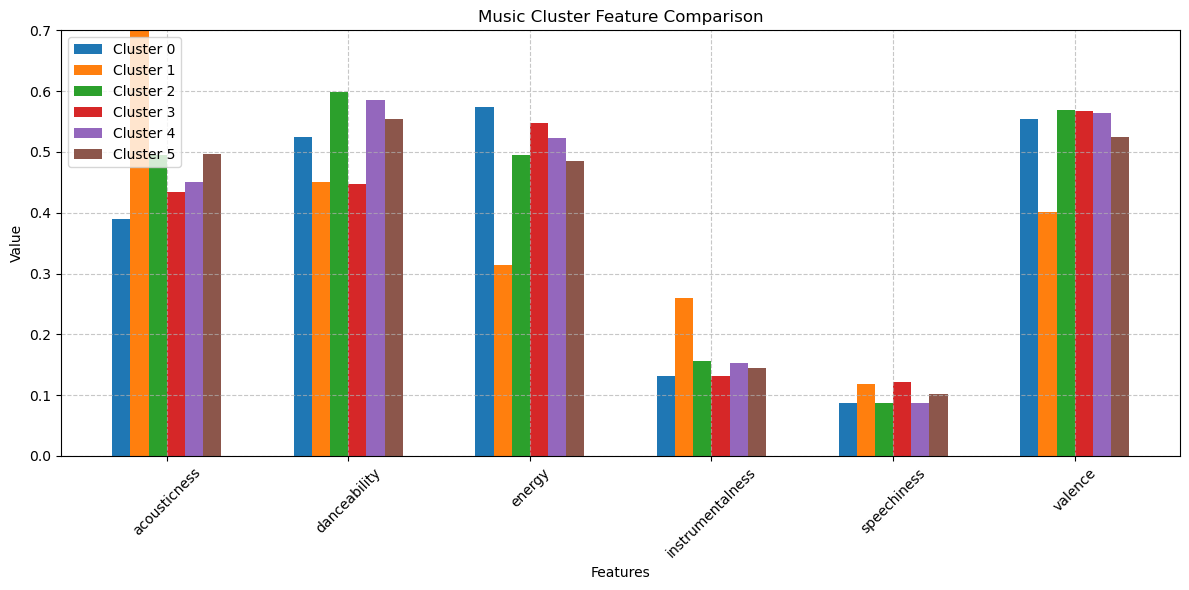

In [17]:
features = ["acousticness", "danceability", "energy", "instrumentalness", "speechiness", "valence"]
plot_data = cluster_df[features]

plt.figure(figsize=(12, 6))
x = np.arange(0, len(features) * 2, 2)
width = 0.2

for i in range(len(plot_data)):
    values = plot_data.iloc[i]
    plt.bar(x + i * width, values, width, label=f'Cluster {i}')

plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Music Cluster Feature Comparison')
plt.xticks(x + width * (len(plot_data) - 1) / 2, features, rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.ylim(0, 0.7)
plt.tight_layout()
plt.show()

### Fuzzy C-Means (FCM) Evaluation for 6 Clusters

#### 1. **Fuzzy Partition Coefficient (FPC)**
- **Range**: The FPC score ranges from 1/6(approx 0.167) (worst) to 1 (best).
- **Interpretation**: A higher FPC score indicates well-defined clusters with less overlap.
  
#### 2. **Partition Entropy (PE)**
- **Range**: The PE score ranges from 0 (best) to log(6)(approx 1.79) (worst).
- **Interpretation**: Lower values of PE indicate that the membership of each data point to a single cluster is more certain, meaning that the clusters are more distinct.

In [18]:
def fuzzy_partition_coefficient(U):
    C, N = U.shape
    FPC = np.sum(U**2) / N
    return FPC

def partition_entropy(U):
    C, N = U.shape
    PE = -np.sum(U * np.log(U)) / N
    return PE

fpc = fuzzy_partition_coefficient(u)
pe = partition_entropy(u)

print("Fuzzy Partition Coefficient (FPC):", fpc)
print("Partition Entropy (PE):", pe)

Fuzzy Partition Coefficient (FPC): 0.616231194681
Partition Entropy (PE): 0.779376317276095


In [19]:
exploded_df

,id,name,artists,year,popularity,valence,acousticness,danceability,energy,explicit,instrumentalness,key,loudness,mode,speechiness,tempo,clusters
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4,0.0594,0.98200,0.279,0.211,0,0.878000,10,-20.096,1,0.0366,80.954,1
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],1921,5,0.9630,0.73200,0.819,0.341,0,0.000000,7,-12.441,1,0.4150,60.936,1
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5,0.0394,0.96100,0.328,0.166,0,0.913000,3,-14.850,1,0.0339,110.339,2
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],1921,3,0.1650,0.96700,0.275,0.309,0,0.000028,5,-9.316,1,0.0354,100.109,5
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],1921,2,0.2530,0.95700,0.418,0.193,0,0.000002,3,-10.096,1,0.0380,101.665,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170649,0OStKKAuXlxA0fMH54Qs6E,Halloweenie III: Seven Days,['Ashnikko'],2020,68,0.7340,0.20600,0.717,0.753,0,0.000000,7,-6.020,1,0.0605,137.936,0
170649,0OStKKAuXlxA0fMH54Qs6E,Halloweenie III: Seven Days,['Ashnikko'],2020,68,0.7340,0.20600,0.717,0.753,0,0.000000,7,-6.020,1,0.0605,137.936,4
170650,4BZXVFYCb76Q0Klojq4piV,AYA,['MAMAMOO'],2020,76,0.6370,0.10100,0.634,0.858,0,0.000009,4,-2.226,0,0.0809,91.688,5
170651,5SiZJoLXp3WOl3J4C8IK0d,Darkness,['Eminem'],2020,70,0.1950,0.00998,0.671,0.623,1,0.000008,2,-7.161,1,0.3080,75.055,1


In [20]:
cluster_to_genre = {
    0: 'Pop-Rock',
    1: 'Indie Pop',
    2: 'Acoustic Folk/Classical',
    3: 'Alternative R&B',
    4: 'Electronic-Dance Music',
    5: 'Dance Pop'
}
genre_df = exploded_df.copy()
genre_df['genre'] = genre_df['clusters'].map(cluster_to_genre)
genre_df = genre_df.drop(columns='clusters')
genre_df.head()

,id,name,artists,year,popularity,valence,acousticness,danceability,energy,explicit,instrumentalness,key,loudness,mode,speechiness,tempo,genre
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4,0.0594,0.982,0.279,0.211,0,0.878000,10,-20.096,1,0.0366,80.954,Indie Pop
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],1921,5,0.9630,0.732,0.819,0.341,0,0.000000,7,-12.441,1,0.4150,60.936,Indie Pop
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5,0.0394,0.961,0.328,0.166,0,0.913000,3,-14.850,1,0.0339,110.339,Acoustic Folk/Classical
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],1921,3,0.1650,0.967,0.275,0.309,0,0.000028,5,-9.316,1,0.0354,100.109,Dance Pop
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],1921,2,0.2530,0.957,0.418,0.193,0,0.000002,3,-10.096,1,0.0380,101.665,Dance Pop


In [21]:
genre_df['genre'].isna().sum()

621

In [22]:
genre_df = genre_df.dropna()

In [23]:
from sklearn.preprocessing import MinMaxScaler

audio_feats = ["acousticness", "danceability", "energy", "instrumentalness", "loudness", "tempo","valence","speechiness"]
scaler = MinMaxScaler()
genre_df[audio_feats] = scaler.fit_transform(genre_df[audio_feats])

In [24]:
genre_df

,id,name,artists,year,popularity,valence,acousticness,danceability,energy,explicit,instrumentalness,key,loudness,mode,speechiness,tempo,genre
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4,0.0594,0.985944,0.240004,0.210984,0,0.878000,10,0.544438,1,0.015193,0.235264,Indie Pop
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],1921,5,0.9630,0.734940,0.818844,0.340987,0,0.000000,7,0.690719,1,0.414433,0.141089,Indie Pop
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5,0.0394,0.964859,0.292529,0.165983,0,0.913000,3,0.644685,1,0.012344,0.373507,Acoustic Folk/Classical
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],1921,3,0.1650,0.970884,0.235717,0.308986,0,0.000028,5,0.750435,1,0.013927,0.325380,Dance Pop
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],1921,2,0.2530,0.960843,0.389002,0.192984,0,0.000002,3,0.735530,1,0.016670,0.332700,Dance Pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170649,0OStKKAuXlxA0fMH54Qs6E,Halloweenie III: Seven Days,['Ashnikko'],2020,68,0.7340,0.206827,0.709508,0.752995,0,0.000000,7,0.813418,1,0.040409,0.503338,Pop-Rock
170649,0OStKKAuXlxA0fMH54Qs6E,Halloweenie III: Seven Days,['Ashnikko'],2020,68,0.7340,0.206827,0.709508,0.752995,0,0.000000,7,0.813418,1,0.040409,0.503338,Electronic-Dance Music
170650,4BZXVFYCb76Q0Klojq4piV,AYA,['MAMAMOO'],2020,76,0.6370,0.101406,0.620538,0.857997,0,0.000009,4,0.885918,0,0.061933,0.285763,Dance Pop
170651,5SiZJoLXp3WOl3J4C8IK0d,Darkness,['Eminem'],2020,70,0.1950,0.010020,0.660199,0.622992,1,0.000008,2,0.791615,1,0.301540,0.207512,Indie Pop


In [25]:
genre_df.to_csv('./data/fuzzy_genre_df.csv')

In [26]:
for i in audio_feats:
    print(i,genre_df[i].median())

acousticness 0.5120481927710844
danceability 0.5304963018544325
energy 0.4739893745853666
instrumentalness 0.000205
loudness 0.7273795646939674
tempo 0.3955405742351608
valence 0.541
speechiness 0.024055707955264818


### Filtering the rows which have max cluster membership less than a threshold _(not used later)_

In [27]:
filtered_indices = [i for i in range(X.shape[0]) if np.max(u[:, i]) >= 0.70]
filtered_df = df.iloc[filtered_indices]
filtered_df.shape

(101197, 17)

In [28]:
for i in filtered_indices:
    memberships = u[:, i]
    cluster = np.argmax(memberships)
    print(f"Data point {i} is most likely in cluster {cluster} with membership {memberships[cluster]}")

Data point 0 is most likely in cluster 1 with membership 0.7625086678260972
Data point 1 is most likely in cluster 1 with membership 0.7046814566784814
Data point 2 is most likely in cluster 2 with membership 0.8781407625233844
Data point 6 is most likely in cluster 1 with membership 0.7899302063554622
Data point 8 is most likely in cluster 1 with membership 0.7341716956337128
Data point 9 is most likely in cluster 2 with membership 0.7877344051577047
Data point 12 is most likely in cluster 3 with membership 0.9705079610478223
Data point 13 is most likely in cluster 1 with membership 0.881978424922303
Data point 17 is most likely in cluster 2 with membership 0.8479352834240401
Data point 18 is most likely in cluster 1 with membership 0.8674809427666259
Data point 21 is most likely in cluster 3 with membership 0.8436952028511463
Data point 22 is most likely in cluster 1 with membership 0.8087806438536472
Data point 23 is most likely in cluster 0 with membership 0.7327666549720441
Data p

Data point 9362 is most likely in cluster 0 with membership 0.9848657344558726
Data point 9363 is most likely in cluster 1 with membership 0.9922894601634499
Data point 9365 is most likely in cluster 1 with membership 0.8623372385379645
Data point 9367 is most likely in cluster 3 with membership 0.8356694788310202
Data point 9368 is most likely in cluster 1 with membership 0.9613715701434029
Data point 9369 is most likely in cluster 0 with membership 0.8761217275471265
Data point 9370 is most likely in cluster 5 with membership 0.9553465623861968
Data point 9371 is most likely in cluster 3 with membership 0.8828954311518202
Data point 9373 is most likely in cluster 5 with membership 0.8748777778665954
Data point 9374 is most likely in cluster 3 with membership 0.9871490318733493
Data point 9375 is most likely in cluster 5 with membership 0.9713204084601277
Data point 9378 is most likely in cluster 0 with membership 0.7584804838624847
Data point 9379 is most likely in cluster 2 with mem

Data point 19780 is most likely in cluster 3 with membership 0.9256189304962104
Data point 19782 is most likely in cluster 1 with membership 0.8665968301545172
Data point 19783 is most likely in cluster 5 with membership 0.7418289478965207
Data point 19786 is most likely in cluster 4 with membership 0.7975813919772434
Data point 19787 is most likely in cluster 2 with membership 0.8030903963534659
Data point 19790 is most likely in cluster 5 with membership 0.7632326961111767
Data point 19791 is most likely in cluster 5 with membership 0.8079970414749089
Data point 19795 is most likely in cluster 0 with membership 0.9406928627935597
Data point 19798 is most likely in cluster 0 with membership 0.9191562283810726
Data point 19799 is most likely in cluster 0 with membership 0.8545590145790634
Data point 19801 is most likely in cluster 5 with membership 0.7418765993588571
Data point 19802 is most likely in cluster 1 with membership 0.9652325603123464
Data point 19804 is most likely in clust

Data point 29291 is most likely in cluster 5 with membership 0.8586376382054997
Data point 29293 is most likely in cluster 0 with membership 0.9809394027820038
Data point 29295 is most likely in cluster 5 with membership 0.8999352855019529
Data point 29296 is most likely in cluster 3 with membership 0.8084325250448077
Data point 29297 is most likely in cluster 1 with membership 0.7897131091630107
Data point 29299 is most likely in cluster 4 with membership 0.754705569773662
Data point 29300 is most likely in cluster 4 with membership 0.8850590523074721
Data point 29301 is most likely in cluster 0 with membership 0.9790035146091322
Data point 29302 is most likely in cluster 5 with membership 0.9459637713053998
Data point 29303 is most likely in cluster 4 with membership 0.7200426944580788
Data point 29304 is most likely in cluster 4 with membership 0.9743110683198501
Data point 29306 is most likely in cluster 2 with membership 0.8032655216715745
Data point 29307 is most likely in cluste

Data point 41955 is most likely in cluster 3 with membership 0.955289574412571
Data point 41956 is most likely in cluster 1 with membership 0.7664071350724347
Data point 41957 is most likely in cluster 1 with membership 0.9185793768325742
Data point 41958 is most likely in cluster 5 with membership 0.969899518367907
Data point 41960 is most likely in cluster 4 with membership 0.9526889190826581
Data point 41961 is most likely in cluster 1 with membership 0.9944227226992308
Data point 41962 is most likely in cluster 1 with membership 0.8516545879458404
Data point 41964 is most likely in cluster 1 with membership 0.913202441236562
Data point 41969 is most likely in cluster 1 with membership 0.8192800533079974
Data point 41970 is most likely in cluster 4 with membership 0.9133842634354072
Data point 41971 is most likely in cluster 1 with membership 0.8145747751170705
Data point 41972 is most likely in cluster 1 with membership 0.7970511842476697
Data point 41973 is most likely in cluster 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
filtered_df['cluster'] = [np.argmax(u[:, i]) for i in filtered_indices]
filtered_df.head()

C:\Users\khushi\AppData\Local\Temp\ipykernel_3748\4175949586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster'] = [np.argmax(u[:, i]) for i in filtered_indices]


,id,name,artists,year,popularity,valence,acousticness,danceability,energy,explicit,instrumentalness,key,loudness,mode,speechiness,tempo,clusters,cluster
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4,0.0594,0.982,0.279,0.211,0,0.878,10,-20.096,1,0.0366,80.954,[1],1
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],1921,5,0.9630,0.732,0.819,0.341,0,0.000,7,-12.441,1,0.4150,60.936,[1],1
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5,0.0394,0.961,0.328,0.166,0,0.913,3,-14.850,1,0.0339,110.339,[2],2
6,5uNZnElqOS3W4fRmRYPk4T,The Wearing of the Green,['John McCormack'],1921,4,0.4060,0.996,0.518,0.203,0,0.000,0,-10.589,1,0.0615,66.221,[1],1
8,05xDjWH9ub67nJJk82yfGf,La Mañanita - Remasterizado,['Ignacio Corsini'],1921,0,0.7210,0.996,0.485,0.130,0,0.151,5,-21.508,0,0.0483,64.678,[1],1


In [30]:
filtered_df['cluster'].value_counts().sort_index()

0    13041
1    18663
2    17890
3    12234
4    19721
5    19648
Name: cluster, dtype: int64

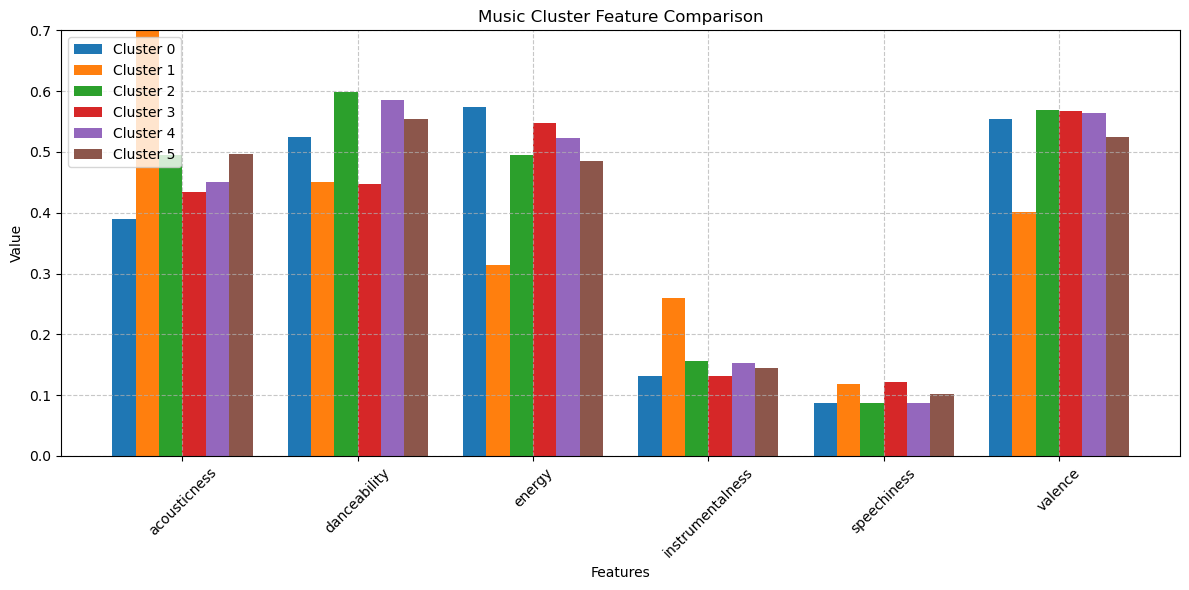

In [31]:
features = ["acousticness", "danceability", "energy", "instrumentalness", "speechiness", "valence"]
plot_data = cluster_df[features]

plt.figure(figsize=(12, 6))
x = np.arange(0, len(features) * 1.5, 1.5)
width = 0.2

for i in range(len(plot_data)):
    values = plot_data.iloc[i]
    plt.bar(x + i * width, values, width, label=f'Cluster {i}')

plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Music Cluster Feature Comparison')
plt.xticks(x + width * (len(plot_data) - 1) / 2, features, rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.ylim(0, 0.7)
plt.tight_layout()
plt.show()

In [32]:
from sklearn.metrics import silhouette_score
X = filtered_df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'tempo', 'valence']].values
clusters = filtered_df['cluster'].values
score = silhouette_score(X, clusters)
print(score)

0.6058169635633872
